# Исследование данных об инфаркте миокарда

В нашем распоряжении есть файл с данными о пациентах, которые отображают состояние их здоровья.
На основании этих данных можно определить вероятность сердечнего приступа у пациента.


Откроем файл и посмотрим, какие данные в нем находятся


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['font.family'] = 'DejaVu Sans'
import numpy as np
import seaborn as sns


data = pd.read_csv('/content/heart.csv')

In [ ]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1


In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

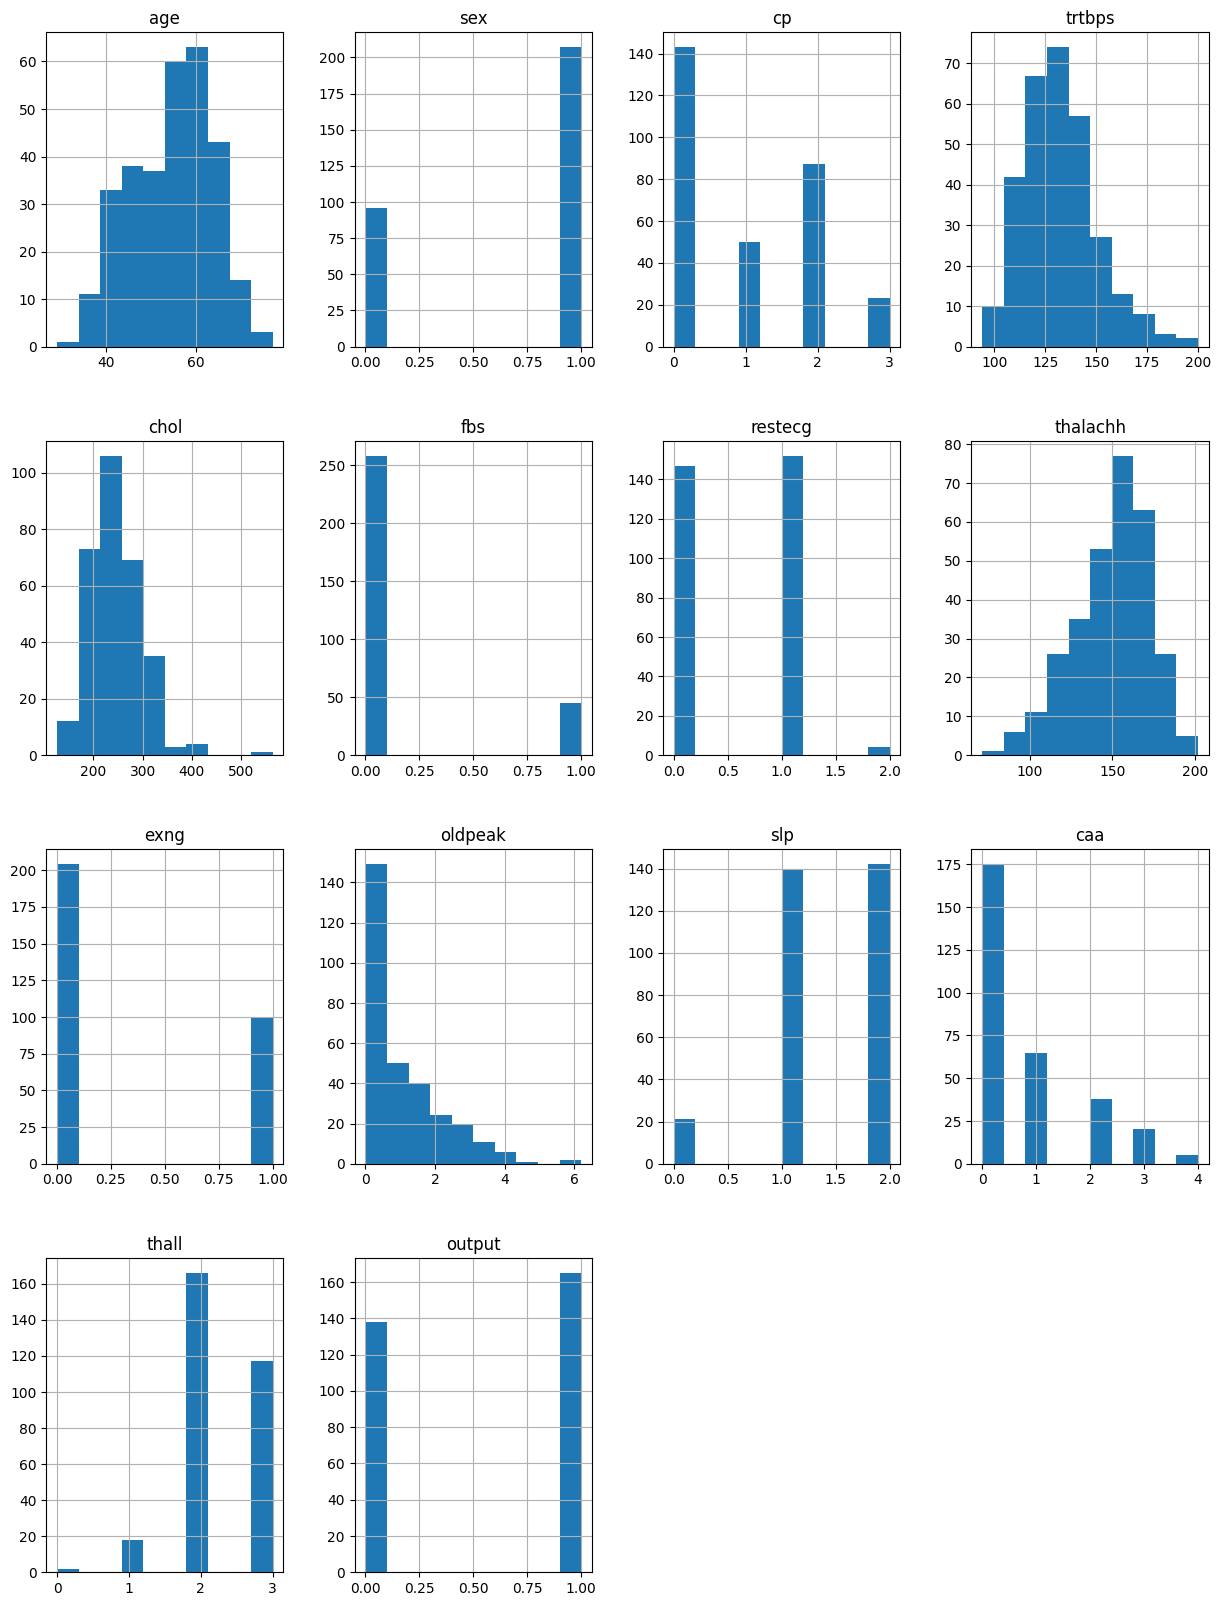

In [ ]:
data.hist(figsize=(15, 20))

In [ ]:
# к сожалению, автор данного датасета не оставил подробных комментариев о том, что конкретно обозначает каждый столбец и каждое значение,
# поэтому придется разбираться с этим путем обращения к интернету, переводчику и медицинским справочникам

# Обозначения столбцов:

age - возраст пациента

sex - пол пациента

cp - боль в груди (1:типичная стенокардия, 2:атипичная стенокардия, 3:неангинальная боль, 4:бессимптомная)

trtbps - кровяное давление в состоянии покоя

chol - уровень холестерина в мг/дл, определяется с помощью ИМТ пациента

fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = ложно)

restecg - результаты электрокардиограммы в состоянии покоя (0: в норме, 1: наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или понижение ST > 0,05 мВ), 2: наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса)

thalachh - максимальный пульс

exng - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

oldpeak - показатель степени ишемии миокарда

slp -  структурированная световая плетизмография

caa - количество крупных судов (0-3)

thall - показатель талассемии (талассемия - заболевание крови, при котором у человека образуется недостаточно гемоглобина)

output - результат

#Вывод

1.Названия данных не соответствуют правилам наименования переменных в Python

2.Всего 303 значения. Пропущенных значений нет

3.Некоторые переменные имеют неправильный тип данных:


fbs - тип int, должен быть bool

exng - тип int, должен быть bool

output - тип int, должен быть bool (есть два значения: 0 - вероятность инфаркта низкая, 1 - вероятность инфаркта высокая)





# Предобработка данных

Для удобства работы с данными нужно переименовать столбцы

In [ ]:
data.rename(columns={'cp':'chest_pain', 'trtbps':'blood_pressure', 'chol':'cholesterol','fbs':'blood_sugar','restecg':'electrocardiogram',
                     'thalachh':'max_heart_rate', 'exng': 'angina_pectoris', 'oldpeak':'myocardial_ischemia_degree',
                     'slp':'structed_light_plethysmography', 'caa':'large_vessels', 'thall':'thalassemia'}, inplace = True)
data.columns

Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
       'blood_sugar', 'electrocardiogram', 'max_heart_rate', 'angina_pectoris',
       'myocardial_ischemia_degree', 'structed_light_plethysmography',
       'large_vessels', 'thalassemia', 'output'],
      dtype='object')

In [ ]:
data.head(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,max_heart_rate,angina_pectoris,myocardial_ischemia_degree,structed_light_plethysmography,large_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Продублируем обозначения столбцов с новыми названиями:

age - возраст пациента

sex - пол пациента (0 - женский, 1 - мужской)

chest_pain - боль в груди (1:типичная стенокардия, 2:атипичная стенокардия, 3:неангинальная боль, 4:бессимптомная)

blood_pressure - кровяное давление в состоянии покоя

cholesterol - уровень холестерина в мг/дл, определяется с помощью ИМТ пациента

blood_sugar - (уровень сахара в крови натощак > 120 мг/дл) (True = верно; False = ложно)

electrocardiogram - результаты электрокардиограммы в состоянии покоя (0: в норме, 1: наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или понижение ST > 0,05 мВ), 2: наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса)

max_heart_rate - максимальный пульс

angina_pectoris - стенокардия, вызванная физической нагрузкой (True = да; False = нет)

myocardial_ischemia_degree - показатель степени ишемии миокарда

strustured_light_plethysmography -  структурированная световая плетизмография

large_vessels - количество крупных судов (0-3) : 0 - сосуды в порядке, 1, 2, 3 указывают на поражение коронарных артерий

thalassemia - показатель талассемии (талассемия - заболевание крови, при котором у человека образуется недостаточно гемоглобина): 0 - бессимптомная форма, 1 - легкое течение болезни, 2 - тяжелое течение болезни, 3 - практически несовместимое с жизнью течение болезни

output - результат(False - вероятность инфаркта низкая, True - вероятность инфаркта высокая)

In [ ]:
data.rename(columns={'angina pectoris':'angina_pectoris'}, inplace = True)

Теперь поменяем тип данных у некоторых столбцов

In [ ]:
data['blood_sugar'] = data['blood_sugar'].astype('bool')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             303 non-null    int64  
 1   sex                             303 non-null    int64  
 2   chest_pain                      303 non-null    int64  
 3   blood_pressure                  303 non-null    int64  
 4   cholesterol                     303 non-null    int64  
 5   blood_sugar                     303 non-null    bool   
 6   electrocardiogram               303 non-null    int64  
 7   max_heart_rate                  303 non-null    int64  
 8   angina_pectoris                 303 non-null    int64  
 9   myocardial_ischemia_degree      303 non-null    float64
 10  structed_light_plethysmography  303 non-null    int64  
 11  large_vessels                   303 non-null    int64  
 12  thalassemia                     303 

In [ ]:
data['angina_pectoris'] = data['angina_pectoris'].astype('bool')
data['output'] = data['output'].astype('bool')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             303 non-null    int64  
 1   sex                             303 non-null    int64  
 2   chest_pain                      303 non-null    int64  
 3   blood_pressure                  303 non-null    int64  
 4   cholesterol                     303 non-null    int64  
 5   blood_sugar                     303 non-null    bool   
 6   electrocardiogram               303 non-null    int64  
 7   max_heart_rate                  303 non-null    int64  
 8   angina_pectoris                 303 non-null    bool   
 9   myocardial_ischemia_degree      303 non-null    float64
 10  structed_light_plethysmography  303 non-null    int64  
 11  large_vessels                   303 non-null    int64  
 12  thalassemia                     303 

# Промежуточный вывод:

1. Изменены названия столбцов
2. Изменены некоторые типы данных

In [ ]:
data.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,electrocardiogram,max_heart_rate,myocardial_ischemia_degree,structed_light_plethysmography,large_vessels,thalassemia
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
display(data)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,max_heart_rate,angina_pectoris,myocardial_ischemia_degree,structed_light_plethysmography,large_vessels,thalassemia,output
0,63,1,3,145,233,True,0,150,False,2.3,0,0,1,True
1,37,1,2,130,250,False,1,187,False,3.5,0,0,2,True
2,41,0,1,130,204,False,0,172,False,1.4,2,0,2,True
3,56,1,1,120,236,False,1,178,False,0.8,2,0,2,True
4,57,0,0,120,354,False,1,163,True,0.6,2,0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,False,1,123,True,0.2,1,0,3,False
299,45,1,3,110,264,False,1,132,False,1.2,1,0,3,False
300,68,1,0,144,193,True,1,141,False,3.4,1,2,3,False
301,57,1,0,130,131,False,1,115,True,1.2,1,1,3,False


#Исследование данных

In [ ]:
len(data[data.output == 0])
# кол-во людей, у которых вероятность инфаркта низкая

138

In [ ]:
len(data[data.output == 1])
# кол-во людей, у которых вероятность инфаркта высокая

165

Рассмотрим зависимость заболевания от пола пациента

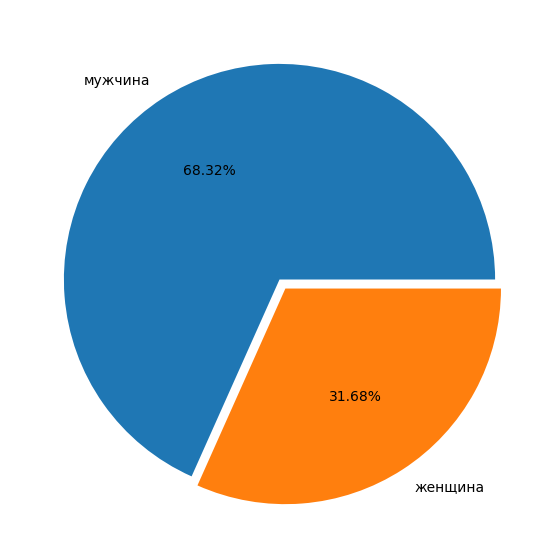

In [ ]:

gender_dict=data['sex'].value_counts()
fig = plt.figure(figsize=(10, 7))
plt.pie(gender_dict, labels=['мужчина', 'женщина'], autopct="%0.2f%%",explode = (0,0.05))

plt.show()

Из графика видно, что мужчин больше, чем женщин, однако это говорит только о количестве пациентов определенного пола в списке.

Рассмотрим процент заболеваний для каждого пола:

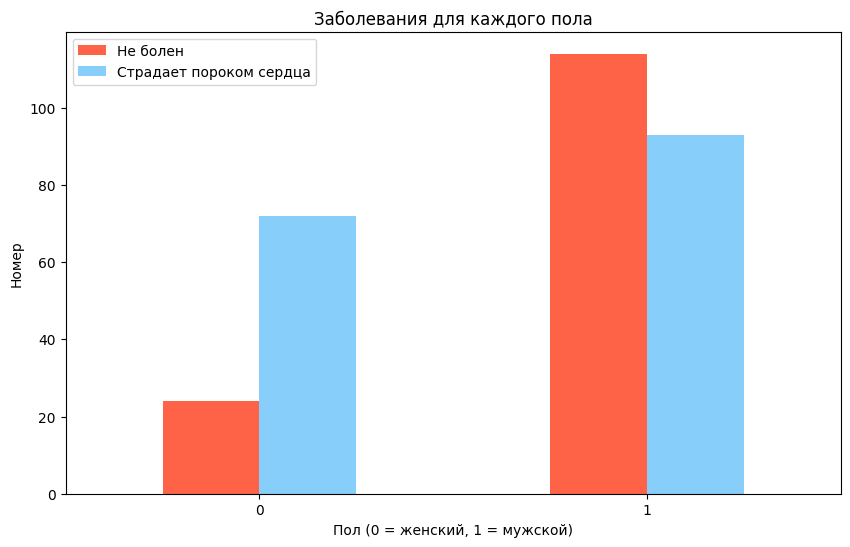

In [ ]:
pd.crosstab(data.sex,data.output).plot(kind="bar",figsize=(10,6),color=['tomato', 'lightskyblue' ])
plt.title('Заболевания для каждого пола')
plt.xlabel('Пол (0 = женский, 1 = мужской)')
plt.xticks(rotation=0)
plt.legend(["Не болен", "Страдает пороком сердца"])
plt.ylabel('Номер')
plt.show()

Из графика видно, что женщины имеют большую склонность с инфаркту, чем мужчины.

Теперь посмотрим на связь возраста и заболевания:

Text(0.5, 1.0, 'Доля заболевших пожилых')

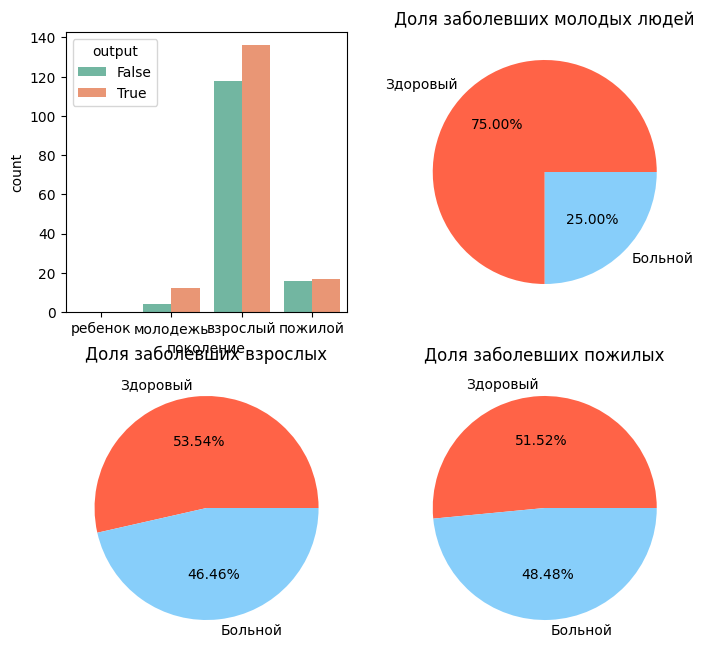

In [ ]:
pd.options.mode.chained_assignment = None
fig,axes=plt.subplots(2,2,figsize=(8,8))
age_dist=data[['age','output']]
age_dist['age_range']=pd.cut(age_dist['age'],bins=[0,18,40,66,200],include_lowest=True,right=False,
                             labels=['ребенок','молодежь','взрослый','пожилой'])
sns.countplot(x='age_range',hue='output',data=age_dist,ax=axes[0,0],palette="Set2")

axes[0,0].set_xlabel("поколение")

youth=age_dist[age_dist['age_range']=='молодежь']['output'].value_counts()
axes[0,1].pie(youth,labels=['Здоровый','Больной'],autopct='%.2f%%',colors = ['tomato', 'lightskyblue'])
axes[0,1].set_title('Доля заболевших молодых людей')

youth=age_dist[age_dist['age_range']=='взрослый']['output'].value_counts()
axes[1,0].pie(youth,labels=['Здоровый','Больной'],autopct='%.2f%%',colors = ['tomato', 'lightskyblue'])
axes[1,0].set_title('Доля заболевших взрослых')

youth=age_dist[age_dist['age_range']=='пожилой']['output'].value_counts()
axes[1,1].pie(youth,labels=['Здоровый','Больной'],autopct='%.2f%%',colors = ['tomato', 'lightskyblue'])
axes[1,1].set_title('Доля заболевших пожилых')



Как можно видеть из графика, среди пожилых людей болезни сердца встречаются чаще, чем среди взрослых и молодых людей.

Почти половина всех людей, старше 66 лет, имеет высокий риск получить инфаркт.
Однако среди взрослых (от 40 до 66 лет) этот показатель тоже довольно высокий.
Самые низкие значения среди молодежи - там всего 1/4 страдают от болезней сердца.



In [ ]:
len(data[data.age < 18])

0

А поскольку людей, младше 18 лет, в таблице нет, то оценить вероятность заболевания среди детей не получится.

Теперь посмотрим на взаимосвязь пульса, давления и инфаркта:

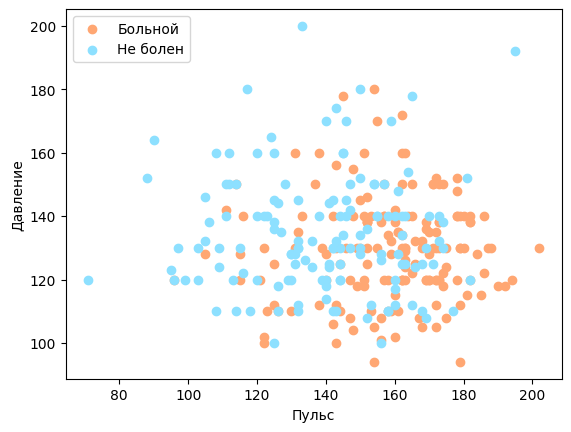

In [ ]:
plt.scatter(x=data.max_heart_rate[data.output==1], y=data.blood_pressure[data.output==1], c="#FFA773")
plt.scatter(x=data.max_heart_rate[data.output==0], y=data.blood_pressure[data.output==0], c="#8DE0FF")
plt.legend(["Больной",'Не болен'])
plt.xlabel("Пульс")
plt.ylabel("Давление")
plt.show()

Из диаграммы рассеивания видно, что корреляция между пульсом и давлением очень слабая. Т.е. нельзя сказать, что чем выше пульс, тем выше давление, и наоборот.

Также из диаграммы видно, что пульс и давление не гарантируют заболевания сердца. Например, изображено, что у двух пациентов с примерно одинаковыми показателями (пульс ~160 и давление чуть больше 100) диагнозы разные: один здоров, другой нет.

Посмотрим, как связаны боли в груди и заболевания сердца:

Text(0.5, 0, 'Типы боли в груди')

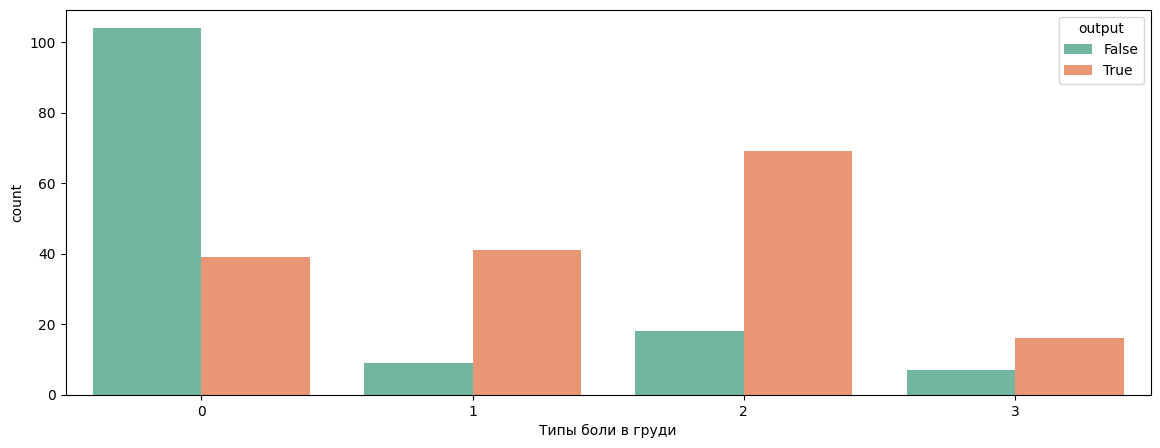

In [ ]:
fig,ax=plt.subplots(figsize=(14,5))
sns.countplot(x='chest_pain',data=data,hue='output',palette='Set2')
ax.set_xlabel('Типы боли в груди')

Справка обозначения болей в груди -

0:типичная стенокардия, 1:атипичная стенокардия, 2:неангинальная боль, 3:бессимптомная

Как показано на графике, большинство болеющих страдают от боли 2-го типа - неанглинальной (т.е. это не стенокардия). Большинство тех, кто имеет типичную стенокардию, тем не менее, здоровы и не имеют риска инфаркта.

Для интереса посмотрим, существует ли зависимость между уровнем сахара в крови  и вероятность инфаркта:



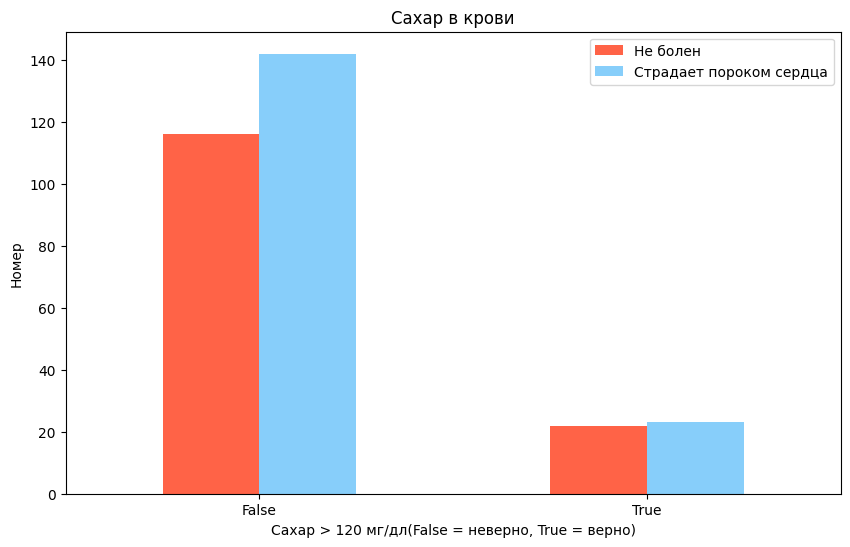

In [ ]:
pd.crosstab(data.blood_sugar,data.output).plot(kind="bar",figsize=(10,6),color=['tomato', 'lightskyblue' ])
plt.title('Сахар в крови')
plt.xlabel('Cахар > 120 мг/дл(False = неверно, True = верно)')
plt.xticks(rotation=0)
plt.legend(["Не болен", "Страдает пороком сердца"])
plt.ylabel('Номер')
plt.show()

Результат получился интересный: если судить по графику, то низкий уровень сахара в крови (ниже 120 мг/дл) есть у большей части заболевших. Таким образом, высокий уровень сахара в крови практически не влияет на вероятность получить инфаркт.

#Едем дальше.

Есть ли корреляция между уровнем холестерина и пульсом? Попробуем узнать:

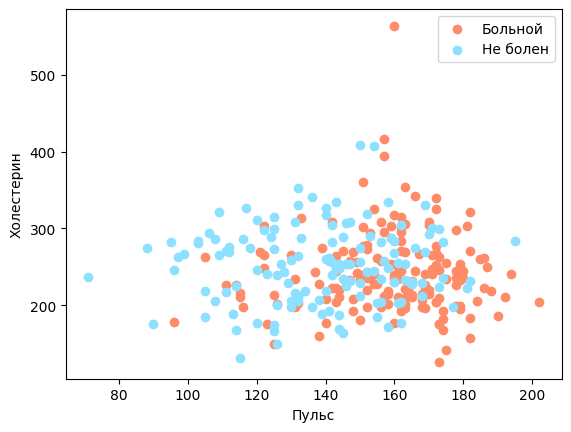

In [ ]:
plt.scatter(x=data.max_heart_rate[data.output==1], y=data.cholesterol[data.output==1], c="#FF8C69")
plt.scatter(x=data.max_heart_rate[data.output==0], y=data.cholesterol[data.output==0], c="#8DE0FF")
plt.legend(["Больной",'Не болен'])
plt.xlabel("Пульс")
plt.ylabel("Холестерин")
plt.show()

Из графика видно, что корреляция очень слабая. Настолько слабая, что ее практически нет.

Вот еще интересный график (уже про возраст и холестерин):

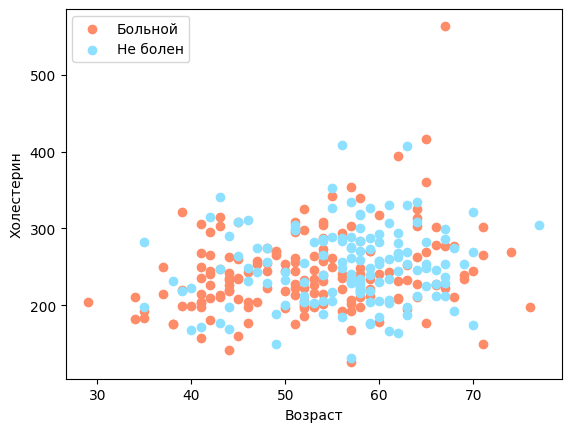

In [ ]:
plt.scatter(x=data.age[data.output==1], y=data.cholesterol[data.output==1], c="#FF8C69")
plt.scatter(x=data.age[data.output==0], y=data.cholesterol[data.output==0], c="#8DE0FF")
plt.legend(["Больной",'Не болен'])
plt.xlabel("Возраст")
plt.ylabel("Холестерин")
plt.show()

Теперь проанализируем результаты электрокардиограммы в состоянии покоя:

Text(0.5, 0, 'Результат электрокардиограммы')

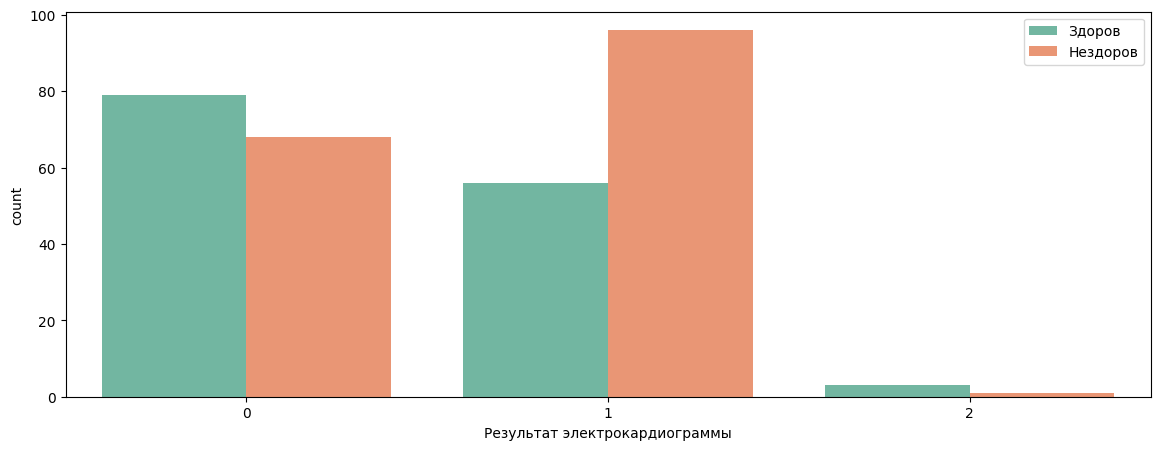

In [ ]:
fig,ax=plt.subplots(figsize=(14,5))
sns.countplot(x='electrocardiogram',data=data,hue='output',palette='Set2')
plt.legend(['Здоров', 'Нездоров'])
ax.set_xlabel('Результат электрокардиограммы')

Очень большое число заболевших пациентов имеют результат электрокардиограммы 1 (наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или понижение ST > 0,05 мВ). в переводе на язык обывателей это обозначает, что у вас могут быть проблемы с сердечком, сходите к кардиологу на всякий пожарный).
Тем не менее, больные также могут иметь результат кардиограммы 0 т.е. без отклонений.

А может ли стенокардия иметь влияние? Сейчас узнаем:

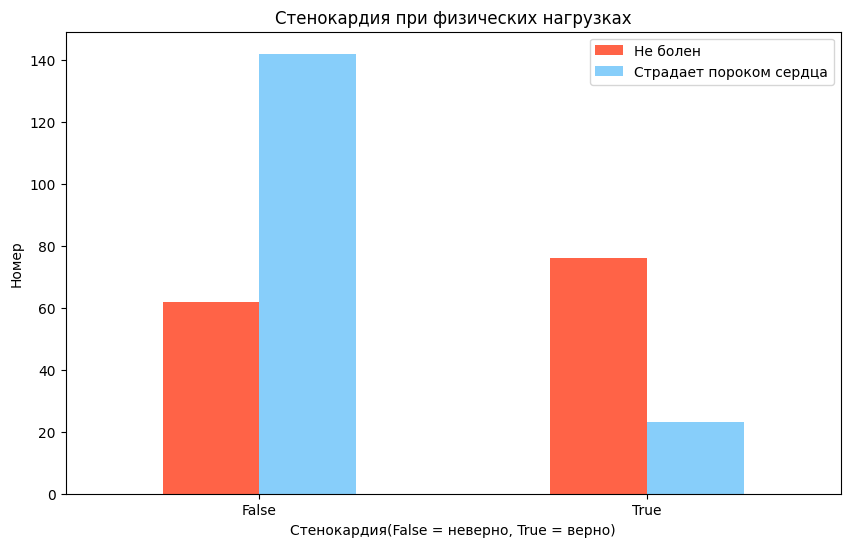

In [ ]:
pd.crosstab(data.angina_pectoris,data.output).plot(kind="bar",figsize=(10,6),color=['tomato', 'lightskyblue' ])
plt.title('Стенокардия при физических нагрузках')
plt.xlabel('Стенокардия(False = неверно, True = верно)')
plt.xticks(rotation=0)
plt.legend(["Не болен", "Страдает пороком сердца"])
plt.ylabel('Номер')
plt.show()

Занимательно: несмотря на отсутствие стенокардии, большое число пациентов подвержено инфаркту.

Напоследок посмотрим на показатели талассемии:

Text(0.5, 0, 'Талассемия')

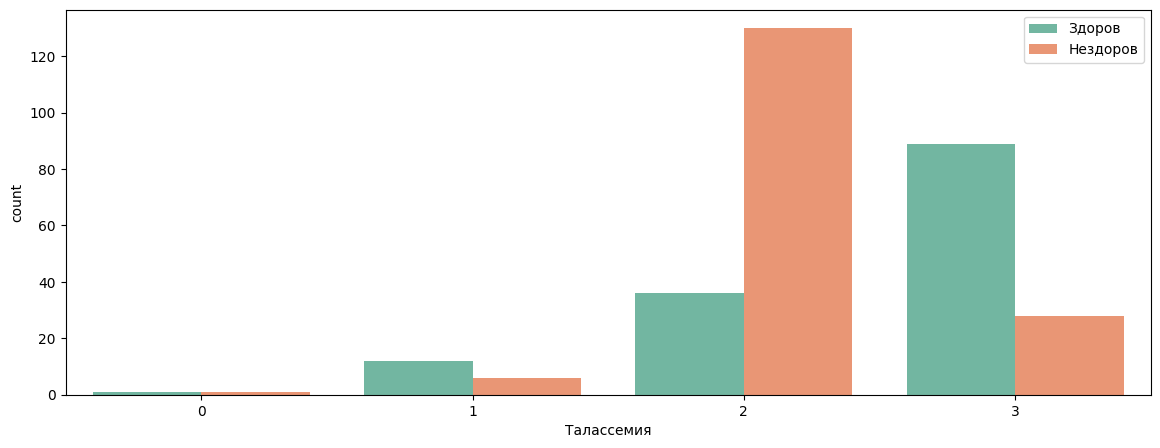

In [ ]:
fig,ax=plt.subplots(figsize=(14,5))
sns.countplot(x='thalassemia',data=data,hue='output',palette='Set2')
plt.legend(['Здоров', 'Нездоров'])
ax.set_xlabel('Талассемия')

Напомним определение талассемии:

талассемия - заболевание крови, при котором у человека образуется недостаточно гемоглобина: 0 - бессимптомная форма, 1 - легкое течение болезни, 2 - тяжелое течение болезни, 3 - практически несовместимое с жизнью течение болезни

Таким образом, большое число заболевших страдают от тяжелой талассемии

Выбросы в данных есть, но минимальные, поэтому не будем их удалять, т.к. мало шансов, что они повлияют на итоговый результат.

(кроме этого, при попытке удалить выбросы, точность модели снизилась :|)

#Выводы:

1.Высокую вероятность имеют пожилые люди (старше 66 лет).

2.Неадекватные результаты электрокардиограммы указывают на заболевания сердца.

3.Женщины заболевают чаще мужчин.

4.При высокой вероятности инфаркта боль в груди чаще всего не связана с ишемией т.е. неангинальная.

5.Уровень сахара в крови, пульс и уровень холестерина практически никак не влияют на инфаркт миокарда.

6.Если у пациента тяжелая талассемия, то вероятность инфаркта повышается.

7.Стенокардия при физических нагрузках почти никакого значения при заболеваниях сердца не имеет.



#Построение модели машинного обучения

Деление на выборки


In [ ]:
target = data['output']
features = data.drop('output', axis=1)

In [ ]:
target

0       True
1       True
2       True
3       True
4       True
       ...  
298    False
299    False
300    False
301    False
302    False
Name: output, Length: 303, dtype: bool

In [ ]:
features

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,max_heart_rate,angina_pectoris,myocardial_ischemia_degree,structed_light_plethysmography,large_vessels,thalassemia
0,63,1,3,145,233,True,0,150,False,2.3,0,0,1
1,37,1,2,130,250,False,1,187,False,3.5,0,0,2
2,41,0,1,130,204,False,0,172,False,1.4,2,0,2
3,56,1,1,120,236,False,1,178,False,0.8,2,0,2
4,57,0,0,120,354,False,1,163,True,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,False,1,123,True,0.2,1,0,3
299,45,1,3,110,264,False,1,132,False,1.2,1,0,3
300,68,1,0,144,193,True,1,141,False,3.4,1,2,3
301,57,1,0,130,131,False,1,115,True,1.2,1,1,3


In [ ]:
features, features_train, target, target_train = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target
)

features_test, features_valid, target_test, target_valid = train_test_split(
    features, target, train_size=0.5, random_state=12345, stratify=target
)

In [ ]:
features_train.shape

(122, 13)

In [ ]:
features_test.shape

(90, 13)

In [ ]:
features_valid.shape

(91, 13)

In [ ]:
122+90+91

303

In [ ]:
target_train.shape

(122,)

Напишем модель. Используем алгоритм дерева решений:

In [ ]:
%time
best_model_dt = None
best_model_dt_deth = 0
best_model_dt_leaf = 0
best_model_dt_split = 0
best_result_dt = 0
for depth in tqdm(range(1, 11)):
  for i in range(1, 46):
    for j in range(2, 26):
      model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=i, min_samples_split=j)
      model_dt.fit(features_train, target_train)
      predictions_dt = model_dt.predict(features_valid)
      result_dt = accuracy_score(target_valid, predictions_dt)
      if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_model_dt_deth = depth
        best_model_dt_leaf = i
        best_model_dt_split = j
        best_result_dt = result_dt
print(f'Лучший результат: {best_result_dt}')
print(f'''Гиперпараметры:
    max_depth = {best_model_dt_deth}
    min_samples_leaf = {best_model_dt_leaf}
    min_samples_split = {best_model_dt_split}
''')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


100%|██████████| 10/10 [00:54<00:00,  5.41s/it]

Лучший результат: 0.8791208791208791
Гиперпараметры:
    max_depth = 4
    min_samples_leaf = 6
    min_samples_split = 2



Точность составила 87%, максимальная глубина дерева - 4, минимальное кол-во листов на дереве - 6, минимальное кол-во веток - 2.

А теперь посмотрим, какой результат будет, если использовать алгоритм случайного леса:

In [ ]:
%time
best_model_dt = None
best_model_dt_deth = 0
best_model_n_estimators = 0
best_result_dt = 0
for depth in tqdm(range(1, 31)):
  for i in range(1, 61):
      model_dt = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators = i)
      model_dt.fit(features_train, target_train)
      predictions_dt = model_dt.predict(features_valid)
      result_dt = accuracy_score(target_valid, predictions_dt)
      if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_model_dt_deth = depth
        best_result_dt = result_dt
        best_model_n_estimators = i
print(f'Лучший результат: {best_result_dt}')
print(f'''Гиперпараметры:
    max_depth = {best_model_dt_deth}
    n_estimators = {best_model_n_estimators}
''')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


100%|██████████| 30/30 [01:42<00:00,  3.41s/it]

Лучший результат: 0.9010989010989011
Гиперпараметры:
    max_depth = 1
    n_estimators = 40



Точность составляет 90%, максимальная глубина - 1, кол-во деревьев - 40.

#Заключение

Была написана модель машинного обучения, определяющая вероятность инфаркта у пациента. Для этого использовался готовый датасет с данными о состоянии здоровья пациентов. Данные были подготовлены для работы, а также изучены.

В модели использовались два алгоритма: алгоритм дерева решений и алгоритм случайного леса. Алгоритм случайного леса показал более высокую точность, чем алгоритм дерева решений, однако он занимает больше времени по сравнению с другим алгоритмом.